In [15]:
import pandas as pd
df = pd.read_csv('births.csv')
df['Decade'] = df['year'] - df['year']%10
df.head()

,year,month,day,gender,births,Decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [16]:
df.describe()

,year,month,day,births,Decade
count,15547.000000,15547.000000,15067.000000,15547.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561,1974.544285
std,6.728340,3.449632,15.284034,28552.465810,6.789583
min,1969.000000,1.000000,1.000000,1.000000,1960.000000
25%,1974.000000,4.000000,8.000000,4358.000000,1970.000000
50%,1979.000000,7.000000,16.000000,4814.000000,1970.000000
75%,1984.000000,10.000000,24.000000,5289.500000,1980.000000
max,2008.000000,12.000000,99.000000,199622.000000,2000.000000


In [17]:
df.isnull().sum()

year        0
month       0
day       480
gender      0
births      0
Decade      0
dtype: int64

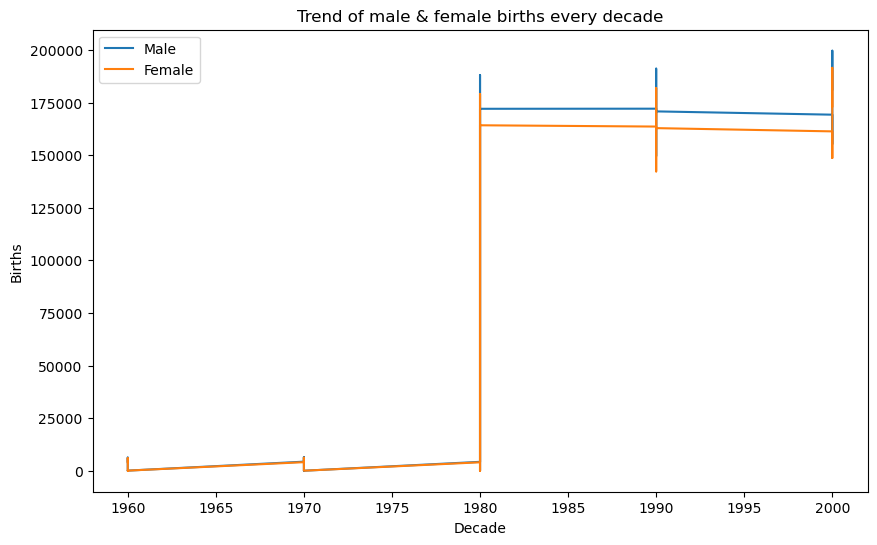

In [18]:
import matplotlib.pyplot as plt

df_male = df[df['gender'] == 'M']
df_female = df[df['gender'] == 'F']

# Set the figure size
plt.figure(figsize=(10, 6))  # Adjust the values as needed

# Plot the line for males
plt.plot(df_male['Decade'], df_male['births'], label='Male')

# Plot the line for females
plt.plot(df_female['Decade'], df_female['births'], label='Female')

# Set labels and title
plt.xlabel('Decade')
plt.ylabel('Births')
plt.title('Trend of male & female births every decade')

plt.legend()

# Show the plot
plt.show()


In [19]:
column_name = 'births'

# Calculate mean and standard deviation
mean_value = df[column_name].mean()
std_dev = df[column_name].std()

# Define the lower and upper bounds
lower_bound = mean_value - 5 * std_dev
upper_bound = mean_value + 5 * std_dev

# Filter the DataFrame to keep only values within the specified range
df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# Display the DataFrame without outliers
print(df)

       year  month  day gender  births  Decade
0      1969      1  1.0      F    4046    1960
1      1969      1  1.0      M    4440    1960
2      1969      1  2.0      F    4454    1960
3      1969      1  2.0      M    4548    1960
4      1969      1  3.0      F    4548    1960
...     ...    ...  ...    ...     ...     ...
15309  1999      2  NaN      F  145172    1990
15357  2001      2  NaN      F  148640    2000
15381  2002      2  NaN      F  148745    2000
15405  2003      2  NaN      F  150278    2000
15453  2005      2  NaN      F  151342    2000

[15086 rows x 6 columns]


C:\Users\DeLL\AppData\Local\Temp\ipykernel_12476\580802890.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='weekday', y='births', hue='Decade', ci=None)


AttributeError: 'int' object has no attribute 'startswith'

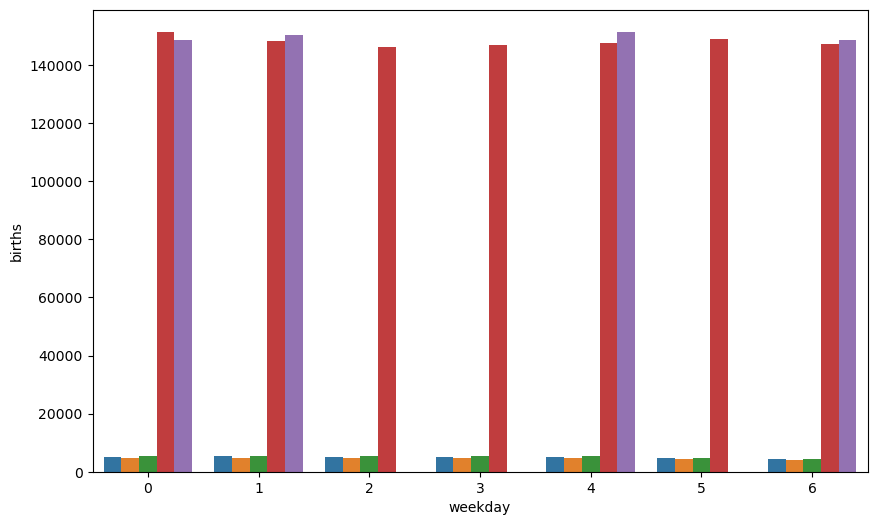

In [23]:
import seaborn as sns

df["day"].fillna(round(df["day"].mean()), inplace = True)
df = df[df["day"] <= 31]
df['date'] = pd.to_datetime(df[['year', 'month', 'day']], errors='coerce')
df['weekday'] = df['date'].dt.weekday

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='weekday', y='births', hue='Decade', ci=None)
plt.title('Births by Weekday for Several Decades')
plt.xlabel('Weekdays')
plt.ylabel('Number of Births')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend(title='Decade')
plt.show()

In [13]:
group_by_day = df.groupby(df["date"].dt.day)
group_by_month = df.groupby(df["date"].dt.month)

print("Group by Day\n\n",group_by_day.head())

print("\n\nGroup by Month\n\n",group_by_month.head(1))

Group by Day

      year  month   day gender  births Decade       date  weekday
0    1969      1   1.0      F    4046   1960 1969-01-01      2.0
1    1969      1   1.0      M    4440   1960 1969-01-01      2.0
2    1969      1   2.0      F    4454   1960 1969-01-02      3.0
3    1969      1   2.0      M    4548   1960 1969-01-02      3.0
4    1969      1   3.0      F    4548   1960 1969-01-03      4.0
..    ...    ...   ...    ...     ...    ...        ...      ...
188  1969      3  31.0      F    4590   1960 1969-03-31      0.0
189  1969      3  31.0      M    5002   1960 1969-03-31      0.0
248  1969      4  29.0      F    4622   1960 1969-04-29      1.0
250  1969      4  30.0      F    4396   1960 1969-04-30      2.0
316  1969      5  31.0      F    4112   1960 1969-05-31      5.0

[155 rows x 8 columns]


Group by Month

      year  month  day gender  births Decade       date  weekday
0    1969      1  1.0      F    4046   1960 1969-01-01      2.0
64   1969      2  1.0      F    43

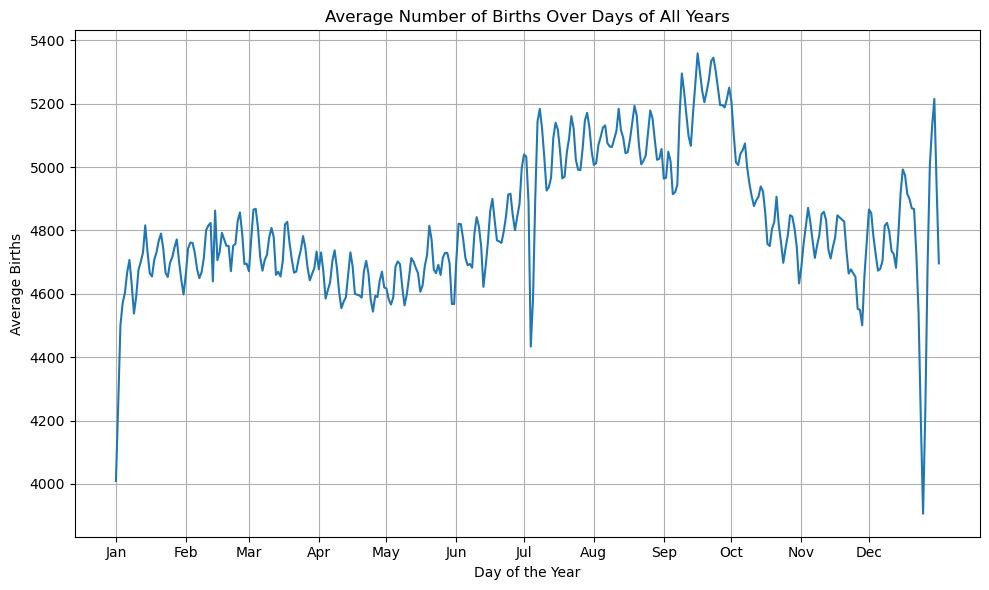

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Convert 'date' column to datetime if it's not already in datetime format
df['date'] = pd.to_datetime(df['date'])

# Calculate the day of the year for each date
df['day_of_year'] = df['date'].dt.dayofyear

# Group by the day of the year and calculate the average number of births
avg_births_per_day = df.groupby('day_of_year')['births'].mean()

# Create a new DataFrame for plotting
plot_df = pd.DataFrame(avg_births_per_day)
plot_df.reset_index(inplace=True)
plot_df.columns = ['Day of Year', 'Average Births']

plot_df = plot_df[plot_df['Average Births'] < 5400 ]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(plot_df['Day of Year'], plot_df['Average Births'])
plt.title('Average Number of Births Over Days of All Years')
plt.xlabel('Day of the Year')
plt.ylabel('Average Births')
plt.grid(True)

# Labeling x-axis with month names
plt.xticks(
    ticks=[1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335],
    labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
)

plt.tight_layout()
plt.show()